In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

#GCP libraries
from google.cloud import storage

# Part: 1
Read the Data into a pandas dataframe for further exploration

Used SQL for Data Exploration


In [6]:
from google.cloud import bigquery

client = bigquery.Client()

# Perform a query.
QUERY = (
    'select count(*) as row_count from raw_data.training_set ')
query_job = client.query(QUERY)  # API request
rows = query_job.result()  # Waits for query to finish

for row in rows:
    print(row.row_count)

195402


In [15]:
# Let's check how many rows have initial year data 1972 data as not null
# These can help us train a better model

QUERY = (
    'select \
count(*) as row_count \
from raw_data.training_set \
where \
_1972__YR1972_ is not null and \
_1972__YR1972_ is not null and \
_1973__YR1973_ is not null and \
_1974__YR1974_ is not null and \
_1975__YR1975_ is not null and \
_1976__YR1976_ is not null and \
_1977__YR1977_	is not null and \
_1978__YR1978_	is not null and \
_1979__YR1979_	is not null and \
_1980__YR1980_	is not null and \
_1981__YR1981_ is not null and \
_1982__YR1982_	is not null and \
_1983__YR1983_	is not null and \
_1984__YR1984_	is not null and \
_1985__YR1985_	is not null and \
_1986__YR1986_ is not null and \
_1987__YR1987_	is not null and \
_1988__YR1988_ is not null and \
_1989__YR1989_ is not null and \
_1990__YR1990_	is not null and \
_1991__YR1991_	is not null and \
_1992__YR1992_ is not null and \
_1993__YR1993_ is not null and \
_1994__YR1994_ is not null and \
_1995__YR1995_ is not null and \
_1996__YR1996_ is not null and \
_1997__YR1997_	is not null and \
_1998__YR1998_	is not null and \
_1999__YR1999_	is not null and \
_2000__YR2000_	is not null and \
_2001__YR2001_	is not null and \
_2002__YR2002_	is not null and \
_2003__YR2003_	is not null and \
_2004__YR2004_	is not null and \
_2005__YR2005_	is not null and \
_2006__YR2006_	is not null and \
_2007__YR2007_	is not null')
query_job = client.query(QUERY) 
rows = query_job.result() 

for row in rows:
    print(str(row.row_count) + " rows have historical data")

54902 rows have historical data


In [ ]:
# Handling missing data in Time Series 
# https://www.kaggle.com/juejuewang/handle-missing-values-in-time-series-for-beginners



In [18]:
# Reading the raw data from GCS and vizualizing the data 
#GCP libraries
from google.cloud import storage

#input variable 
bucket_name = "udgm-bucket-1"
#gs://umdg-bucket-1/data/TrainingSet.csv

In [34]:
training_data = pd.read_csv("../data/TrainingSet.csv", index_col=0)
submission_labels = pd.read_csv("../data/SubmissionRows.csv", index_col=0)

training_data.info(verbose)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195402 entries, 0 to 286117
Data columns (total 39 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   1972 [YR1972]  64945 non-null   float64
 1   1973 [YR1973]  64443 non-null   float64
 2   1974 [YR1974]  64966 non-null   float64
 3   1975 [YR1975]  66973 non-null   float64
 4   1976 [YR1976]  67717 non-null   float64
 5   1977 [YR1977]  69735 non-null   float64
 6   1978 [YR1978]  69763 non-null   float64
 7   1979 [YR1979]  69906 non-null   float64
 8   1980 [YR1980]  75250 non-null   float64
 9   1981 [YR1981]  78034 non-null   float64
 10  1982 [YR1982]  79016 non-null   float64
 11  1983 [YR1983]  78982 non-null   float64
 12  1984 [YR1984]  79532 non-null   float64
 13  1985 [YR1985]  81017 non-null   float64
 14  1986 [YR1986]  81455 non-null   float64
 15  1987 [YR1987]  82752 non-null   float64
 16  1988 [YR1988]  83242 non-null   float64
 17  1989 [YR1989]  86331 non-null

In [31]:
# let's rename the columns
training_data.rename(columns={"1972 [YR1972]": "1972", \
                           "1973 [YR1973]": "1973", \
                           "1974 [YR1974]": "1974", \
                               "1975 [YR1975]": "1975", \
                               "1976 [YR1976]": "1976", \
                               "1977 [YR1977]": "1977", \
                               "1978 [YR1978]": "1978", \
                               "1979 [YR1979]": "1979", \
                               "1980 [YR1980]": "1980", \
                               "1981 [YR1981]": "1981", \
                              "1982 [YR1982]": "1982", \
                              "1983 [YR1983]": "1983", \
                              "1984 [YR1984]": "1984", \
                              "1985 [YR1985]": "1985", \
                              "1986 [YR1986]": "1986", \
                              "1987 [YR1987]": "1987", \
                              "1988 [YR1988]": "1988", \
                              "1989 [YR1989]": "1989", \
                              "1990 [YR1990]": "1990", \
                              "1991 [YR1991]": "1991", \
                              "1992 [YR1992]": "1992", \
                              "1993 [YR1993]": "1993", \
                              "1994 [YR1994]": "1994", \
                              "1995 [YR1995]": "1995", \
                              "1996 [YR1996]": "1996", \
                              "1997 [YR1997]": "1997", \
                              "1998 [YR1998]": "1998", \
                              "1999 [YR1999]": "1999", \
                              "2000 [YR2000]": "2000", \
                              "2001 [YR2001]": "2001", \
                              "2002 [YR2002]": "2002", \
                              "2003 [YR2003]": "2003", \
                              "2004 [YR2004]": "2004", \
                              "2005 [YR2005]": "2005", \
                              "2006 [YR2006]": "2006", \
                              "2007 [YR2007]": "2007", \
                              "Unnamed: 0":"id" \

                             })

,id,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2001,2002,2003,2004,2005,2006,2007,Country Name,Series Code,Series Name
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.244887,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.933105,Afghanistan,allsi.gen_pop,(%) Generosity of All Social Insurance
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.996814,Afghanistan,allsp.gen_pop,(%) Generosity of All Social Protection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195397,286113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.2,NaN,Zimbabwe,SG.VAW.BURN.ZS,Women who believe a husband is justified in be...
195398,286114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.0,NaN,Zimbabwe,SG.VAW.GOES.ZS,Women who believe a husband is justified in be...
195399,286115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30.2,NaN,Zimbabwe,SG.VAW.NEGL.ZS,Women who believe a husband is justified in be...
195400,286116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24.3,NaN,Zimbabwe,SG.VAW.REFU.ZS,Women who believe a husband is justified in be...


In [36]:
def generate_year_list(start, stop=None):
    """ 
    make a list of column names for specific years
    in the format they appear in the data frame start/stop inclusive
    """
    
    if isinstance(start, list):
        data_range = start
    elif stop:
        data_range = range(start, stop+1)
    else:
        data_range = [start]
    
    yrs = []
    
    for yr in data_range:
        yrs.append("{0} [YR{0}]".format(yr))
        
    return yrs

# Let's plot 
prediction_rows = training_data.loc[submission_labels.index]
prediction_rows = prediction_rows[generate_year_list(1972, 2007)]
prediction_rows.head()




,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],...,1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007]
559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1520,0.1870,0.2210,0.256000,0.291000,0.325000,0.360000,0.395000,0.430000,0.4650
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000047,0.000046,0.000879,0.001058,0.012241,0.021071,0.0190
753,0.296,0.2909,0.2852,0.2798,0.2742,0.2683,0.2624,0.2565,0.2503,0.2439,...,0.1391,0.1366,0.1339,0.131000,0.127700,0.124400,0.121000,0.117700,0.114500,0.1115
1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0010,0.0010,0.0010,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.0010
1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9650,0.9650,0.9650,0.964000,0.964000,0.963000,0.963000,0.962000,0.962000,0.9610


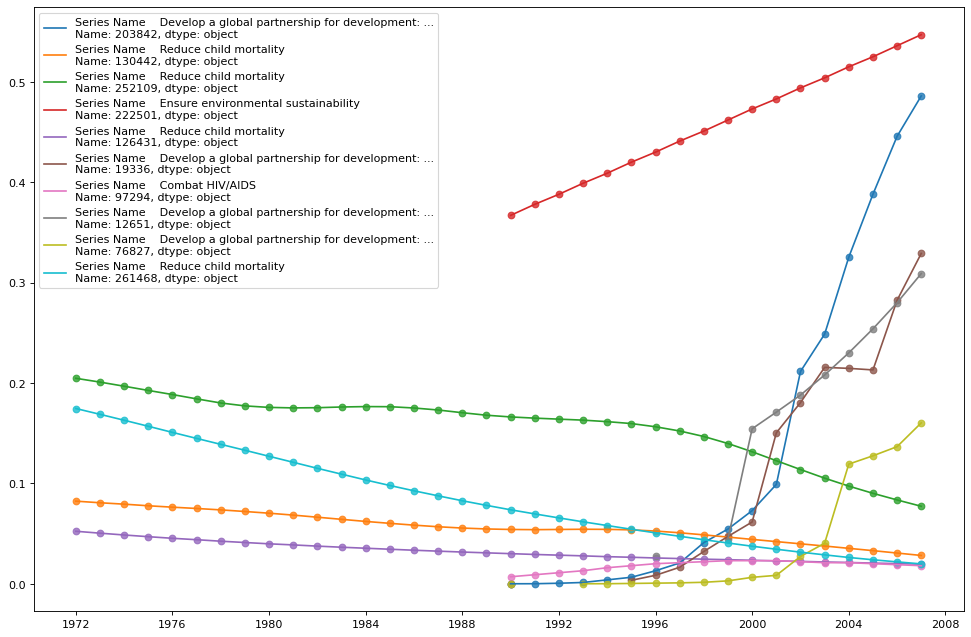

In [64]:
np.random.seed(896)
rand_rows = np.random.choice(prediction_rows.index.values, size=10)
get_rows = lambda: enumerate(rand_rows)

from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

for i, r in get_rows():
    time_data = prediction_rows.loc[r]
    just_years = [y[:4] for y in prediction_rows.columns]
    X = pd.DatetimeIndex(just_years)
    
    descrip = training_data[[ "Series Name"]].loc[r]
    plt.plot(X, time_data,label="{}".format(descrip), ls="-")
    plt.scatter(X, time_data, alpha=0.8)
    plt.legend(loc=0)

# Part2 
Modelling 


In [65]:
#Given the data available, qualitative forecasting methods must be used. 

#https://otexts.com/fpp2/data-methods.html

# Great recommendation on cross validating time series models 

# https://towardsdatascience.com/an-overview-of-time-series-forecasting-models-a2fa7a358fcb



